In [1]:
import pandas as pd
import numpy as np 
dimport statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from tqdm import tqdm

# Vizualization

In [74]:
import matplotlib.colors as mcolors
mcolors.TABLEAU_COLORS

{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

## by registers with fitted line and mean per year

Wall time: 4min 52s


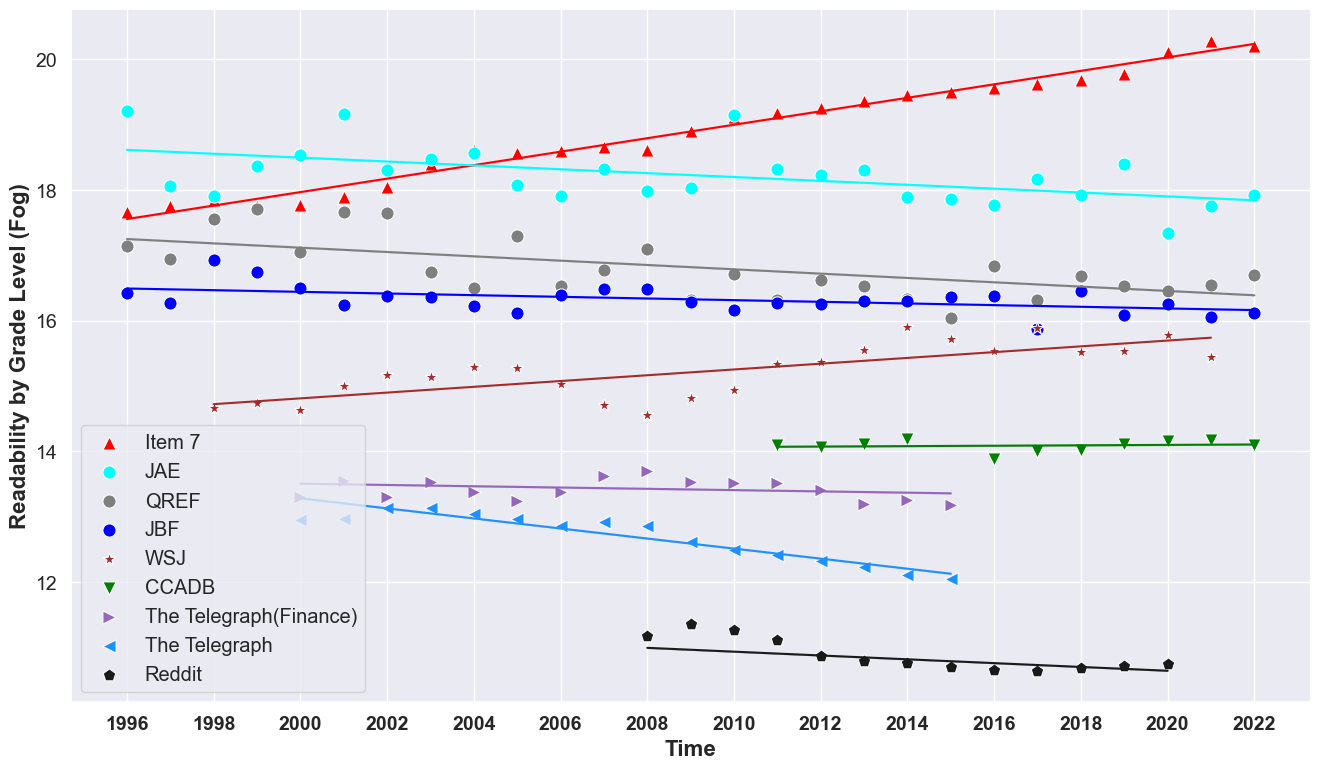

In [80]:
%%time
plt.figure(figsize=(16,9))
plt.xticks(np.arange(1996,2023,2), fontsize=14,weight="bold")
#plt.title("Average Fog Index by Year in Multiple Registers", fontsize=20)

sns.scatterplot(data=item7_txt.groupby("year")["fog"].mean(), marker="^",
                color="red", s=90, label="Item 7")
p_item7 = np.polyfit(item7_txt['year'], item7_txt["fog"],1)
sns.lineplot(x=item7_txt["year"], y=np.polyval(p_item7, item7_txt["year"]), color="red")

sns.scatterplot(data=jae.groupby("year")["fog"].mean(), marker="o",
                color="cyan", s=90, label="JAE")
p_jae = np.polyfit(jae["year"], jae["fog"],1)
sns.lineplot(x=jae["year"], y=np.polyval(p_jae, jae["year"]), color="cyan")

#sns.scatterplot(data=ribf.groupby("year")["fog"].mean(), marker="o",
#                color="pink", s=90, label="RIBF")
#p_ribf = np.polyfit(ribf["year"], ribf["fog"],1)
#sns.lineplot(x=ribf["year"], y=np.polyval(p_ribf, ribf["year"]), color="pink")

sns.scatterplot(data=qref.groupby("year")["fog"].mean(), marker="o",
                color="#7f7f7f", s=90, label="QREF")
p_qref = np.polyfit(qref["year"], qref["fog"],1)
sns.lineplot(x=qref["year"], y=np.polyval(p_qref, qref["year"]), color="#7f7f7f")

sns.scatterplot(data=jbf.groupby("year")["fog"].mean(), marker="o",
                color="blue", s=90, label="JBF")
p_jbf = np.polyfit(jbf["year"], jbf["fog"],1)
sns.lineplot(x=jbf["year"], y=np.polyval(p_jbf, jbf["year"]), color="blue")

sns.scatterplot(data=wsj.groupby("year")["mean_Fog"].mean(), marker="*",
                color="brown", s=90, label="WSJ")
p_item7 = np.polyfit(wsj['year'], wsj["mean_Fog"],1)
sns.lineplot(x=wsj["year"], y=np.polyval(p_item7, wsj["year"]), color="brown")

sns.scatterplot(data=cca[cca.fog>=10].groupby("year")["fog"].mean(), marker="v", s=90, 
                color="green", label="CCADB")
p_cca = np.polyfit(cca[cca.fog>=10]['year'], cca[cca.fog>=10]["fog"],1)
sns.lineplot(x=cca[cca.fog>=10]["year"], y=np.polyval(p_cca, cca[cca.fog>=10]["year"]), color="green")

sns.scatterplot(data=finance.groupby("year")["Fog"].mean(), marker=">",color='#9467bd',
                s=90, label="The Telegraph(Finance)")
p_finance = np.polyfit(finance['year'], finance['Fog'],1)
sns.lineplot(x=finance['year'], y=np.polyval(p_finance, finance['year']),color="#9467bd")

sns.scatterplot(data=tele.groupby("year")["Fog"].mean(), 
                color="dodgerblue", s=90, marker="<", label="The Telegraph")
p_telegraph = np.polyfit(tele["year"], tele["Fog"],1)
sns.lineplot(x=tele['year'], y=np.polyval(p_telegraph, tele['year']),color="dodgerblue")

sns.scatterplot(data=reddit.groupby("year")["fog"].mean(), marker="p", s=90, color="k", label="Reddit")
p_reddit = np.polyfit(reddit['year'], reddit['fog'],1)
sns.lineplot(x=reddit['year'], y=np.polyval(p_reddit, reddit['year']), color="k")

plt.xlabel("Time", fontdict={"size":16, "weight":"bold"})
plt.ylabel ("Readability by Grade Level (Fog)", fontdict={"size":16, "weight":"bold"})
plt.yticks(fontsize=14)
plt.legend(fontsize="large")
plt.savefig("item7_vs_registers_2023.png")

In [81]:
X = sm.add_constant((item7_txt.groupby("year")["fog"].mean().index-1996)/12)
y = item7_txt.groupby("year")["fog_score_item7"].mean().values
r_model_sec = sm.OLS(y,X)
r_sec = r_model_sec.fit()
r_sec.params, r_sec.rsquared

(array([17.50563417,  1.21542966]), 0.979326017901599)

In [82]:
r_sec.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.978   
Dependent Variable: y                AIC:                -36.3470
Date:               2023-07-20 10:37 BIC:                -33.7554
No. Observations:   27               Log-Likelihood:     20.174  
Df Model:           1                F-statistic:        1184.   
Df Residuals:       25               Prob (F-statistic): 1.40e-22
R-squared:          0.979            Scale:              0.014190
-------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
-------------------------------------------------------------------
const    17.5056     0.0446   392.4658   0.0000   17.4138   17.5975
x1        1.2154     0.0353    34.4129   0.0000    1.1427    1.2882
-----------------------------------------------------------------
Omnibus:               0.174        Durbin-Watson:          0.831
Prob(Omnibus):         0.917        Jarque-Bera (JB):       0.364
Skew:                  -0.131       Prob(JB):               0.834
Kurtosis:              2.495        Condition No.:          4    
=================================================================

"""

In [83]:
X = sm.add_constant((wsj.groupby("year")["mean_Fog"].mean().index-1998)/12)
y = wsj.groupby("year")["mean_Fog"].mean().values
r_model_wsj = sm.OLS(y,X)
r_wsj = r_model_wsj.fit()
r_wsj.params, r_wsj.rsquared, r_wsj.pvalues[1]

(array([14.72396836,  0.53028055]), 0.574009196221269, 1.8077888081365645e-05)

In [388]:
X = sm.add_constant((finance.groupby("year")["Fog"].mean().index-2000)/12)
y = finance.groupby("year")["Fog"].mean().values
r_model_finance = sm.OLS(y,X)
r_finance = r_model_finance.fit()
r_finance.params, r_finance.rsquared, r_finance.pvalues

(array([13.47000099, -0.08991279]),
 0.050518538252475875,
 array([7.88898995e-25, 4.02642472e-01]))

In [389]:
X = sm.add_constant((jbf.groupby("year")["fog"].mean().index-1996)/12)
y = jbf.groupby("year")["fog"].mean().values
r_model_jbf = sm.OLS(y,X)
r_jbf = r_model_jbf.fit()
r_jbf.params, r_jbf.rsquared, r_jbf.pvalues

(array([16.51389633, -0.17549632]),
 0.30520874868108505,
 array([7.19212257e-44, 2.80694832e-03]))

In [390]:
X = sm.add_constant((jae.groupby("year")["fog"].mean().index-1996)/12)
y = jae.groupby("year")["fog"].mean().values
r_model_jae = sm.OLS(y,X)
r_jae = r_model_jae.fit()
r_jae.params, r_jae.rsquared_adj, r_jae.pvalues

(array([18.59891154, -0.34890903]),
 0.2440480723709132,
 array([7.40311959e-37, 5.16336937e-03]))

In [319]:
X = sm.add_constant((qref.groupby("year")["fog"].mean().index-1996)/12)
y = qref.groupby("year")["fog"].mean().values
r_model_qref = sm.OLS(y,X)
r_qref = r_model_qref.fit()
r_qref.params, r_qref.rsquared

(array([17.30150233, -0.46298844]), 0.44941389779441)

In [64]:
X = sm.add_constant((ribf["year"].values-2004)/12)
y = ribf["fog"].values
r_model_ribf = sm.OLS(y,X)
r_ribf = r_model_ribf.fit()
r_ribf.params

array([17.03819472, -0.1315597 ])

In [393]:
X = sm.add_constant((tele.groupby("year")["Fog"].mean().index-2000)/12)
y = tele.groupby("year")["Fog"].mean().values
r_model_telegraph = sm.OLS(y,X)
r_telegraph = r_model_telegraph.fit()
r_telegraph.params, r_telegraph.rsquared, r_telegraph.pvalues

(array([13.23771403, -0.87092654]),
 0.8711960538093503,
 array([1.20163519e-25, 1.30809146e-07]))

In [395]:
X = sm.add_constant((reddit.groupby("year")["fog"].mean().index-2008)/12)
y = reddit.groupby("year")["fog"].mean().values
r_model_reddit = sm.OLS(y,X)
r_reddit = r_model_reddit.fit()
r_reddit.params, r_reddit.rsquared, r_reddit.pvalues

(array([11.21106682, -0.65341263]),
 0.7233361884716241,
 array([9.31208625e-20, 2.29293556e-04]))

In [405]:
X = sm.add_constant((cca.groupby("year")["fog"].mean().index-2011)/12)
y = cca.groupby("year")["fog"].mean().values
r_model_cca = sm.OLS(y,X)
r_cca = r_model_cca.fit()
r_cca.params, r_cca.rsquared, r_cca.pvalues[1]

(array([14.04653215, -0.071503  ]), 0.035801413856545894, 0.577385688429414)

# by register with CI

Wall time: 1h 24min 9s


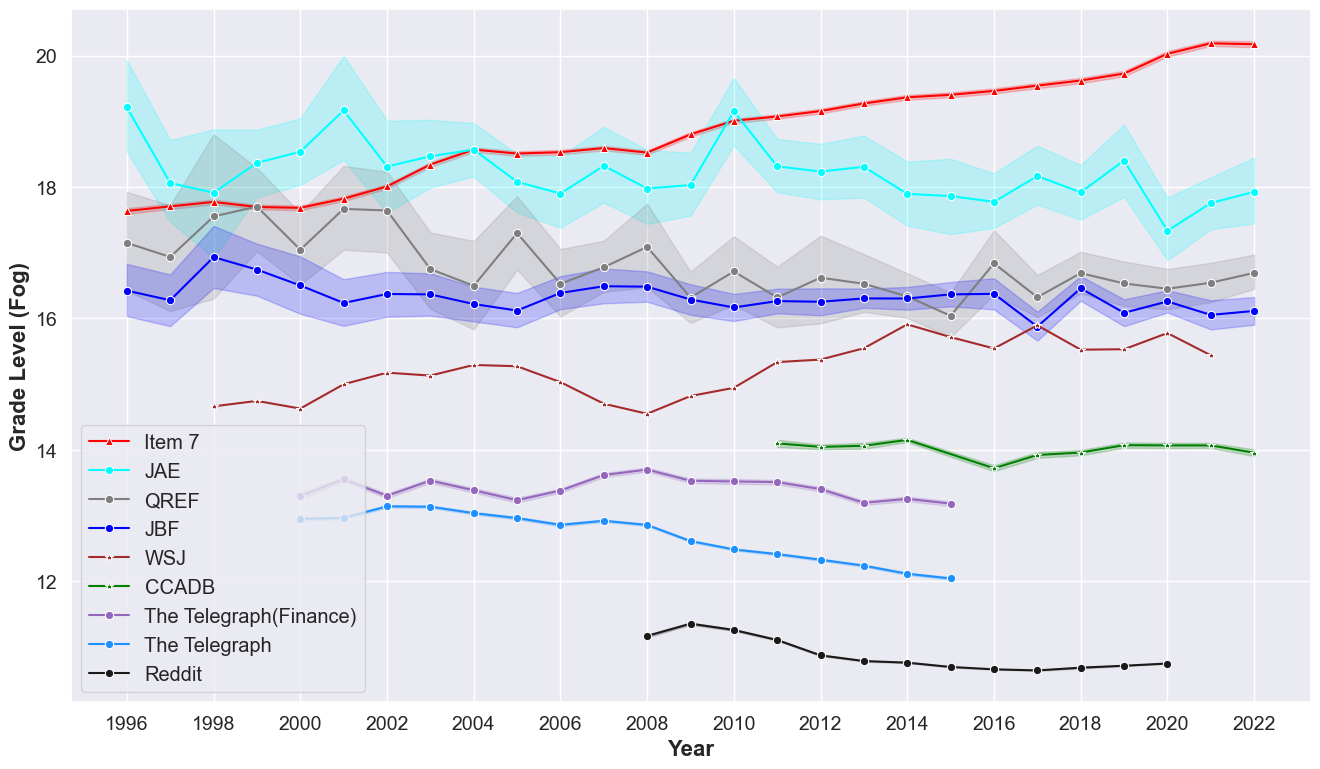

In [84]:
%%time
plt.figure(figsize=(16,9))
plt.xticks(np.arange(1996,2023,2), fontsize=14)

sns.lineplot(x="year", y="fog_score_item7", data=item7_txt, marker="^", n_boot=20000,
             errorbar=("ci",95),  color="red", label="Item 7")
sns.lineplot(x="year", y="fog", data=jae, marker="o",n_boot=jae.shape[0],
                errorbar=("ci",95), color="cyan", label="JAE")
sns.lineplot(x="year", y="fog", data=qref, marker="o",n_boot=qref.shape[0],
                errorbar=("ci",95), color="#7f7f7f", label="QREF")
sns.lineplot(x="year", y="fog", data=jbf, marker="o",n_boot=jbf.shape[0],
                errorbar=("ci",95), color="blue", label="JBF")
sns.lineplot(data=wsj.groupby("year")["mean_Fog"].mean(), marker="*",
                color="brown", label="WSJ")
sns.lineplot(x="year", y="fog", data=cca, marker="*",n_boot=20000,
                errorbar=("ci",95), color="green", label="CCADB")
sns.lineplot(x="year", y="Fog", data=finance, marker="o",n_boot=20000,
                errorbar=("ci",95), color='#9467bd', label="The Telegraph(Finance)")
sns.lineplot(x="year", y="Fog", data=tele, marker="o",n_boot=20000,
                errorbar=("ci",95), color="dodgerblue", label="The Telegraph")
sns.lineplot(x="year", y="fog", data=reddit, marker="o",n_boot=20000,
                errorbar=("ci",95), color="k", label="Reddit")

plt.xlabel("Year", fontdict={"size":16, "weight":"bold"})
plt.ylabel ("Grade Level (Fog)", fontdict={"size":16, "weight":"bold"})
plt.yticks(fontsize=14)
plt.legend(fontsize="large")
plt.savefig("item7_vs_registers_CI_2023.png")